In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [180]:
train_data = pd.read_csv("Train.csv")
train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35


In [181]:
train_data.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [182]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [183]:
# Convert invoice date to date fomat
import datetime as dt
train_data['InvoiceDate'] = pd.to_datetime(train_data['InvoiceDate'])
#train_data['InvoiceDate']=train_data['InvoiceDate'].map(dt.datetime.toordinal)

In [184]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284780 non-null  int64         
 1   StockCode    284780 non-null  int64         
 2   Description  284780 non-null  int64         
 3   Quantity     284780 non-null  int64         
 4   InvoiceDate  284780 non-null  datetime64[ns]
 5   UnitPrice    284780 non-null  float64       
 6   CustomerID   284780 non-null  float64       
 7   Country      284780 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 17.4 MB


##### Create new features of year, month and day from invoice date

In [185]:
train_data['Year']=pd.DatetimeIndex(train_data['InvoiceDate']).year

In [186]:
train_data['Month']=pd.DatetimeIndex(train_data['InvoiceDate']).month

In [187]:
train_data['Day']=pd.DatetimeIndex(train_data['InvoiceDate']).day

In [188]:
train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,6
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,11
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,20
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,22
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,6
...,...,...,...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35,2011,3,1
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35,2011,10,13
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35,2011,5,16
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35,2011,10,11


In [124]:
##### As we have created new features from Invoiuce date- we will drop this feature and also irrelaventfeatutre like InvoiceNo

In [189]:
#Drop irrelavent columns
train_data1 = train_data.drop(['InvoiceDate','InvoiceNo','CustomerID'],axis=1, inplace= False)


In [190]:
train_data1

,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Day
0,1583,144,3,3.75,35,2011,5,6
1,1300,3682,6,1.95,35,2011,5,11
2,2178,1939,4,5.95,35,2011,11,20
3,2115,2983,1,0.83,35,2011,11,22
4,1210,2886,12,1.65,35,2011,5,6
...,...,...,...,...,...,...,...,...
284775,1706,1081,6,1.65,35,2011,3,1
284776,2184,2947,16,0.65,35,2011,10,13
284777,667,3632,4,8.50,35,2011,5,16
284778,1576,3089,48,3.45,35,2011,10,11


In [191]:
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

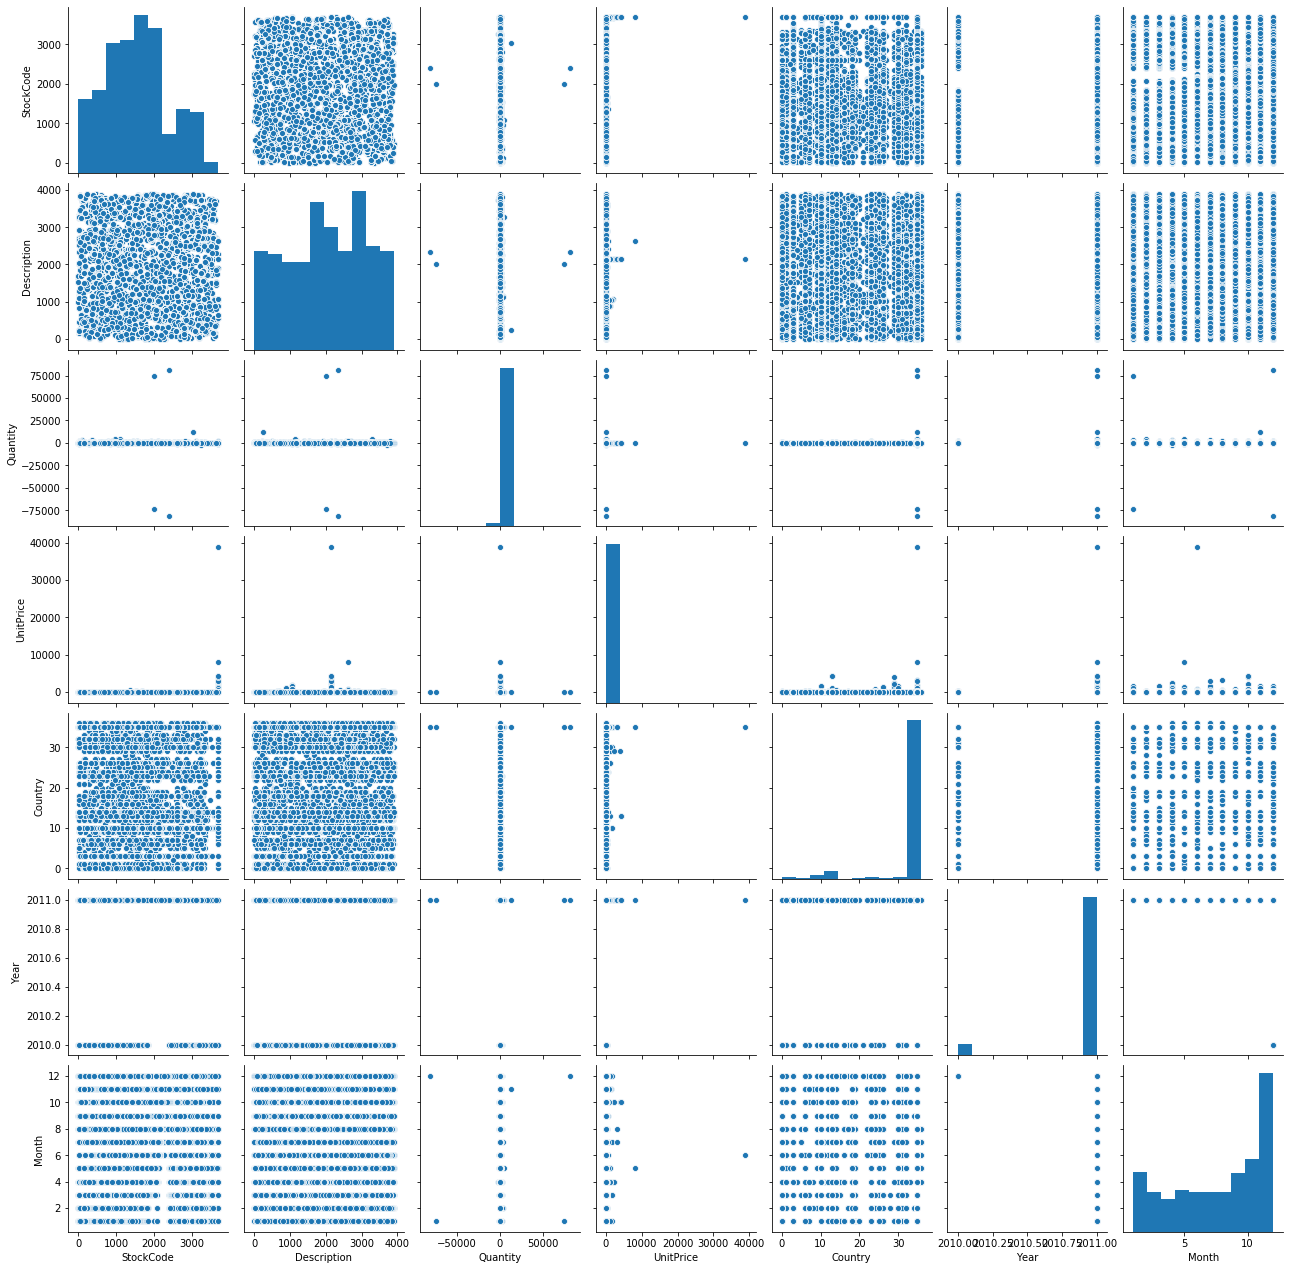

In [72]:
# Distribution of attributes for all the classes
sns.pairplot(train_data1)

#### Way Forward-
1. We donot see any good correlation among data hence tree based models will be more suitable
2. Since we will be using tree based model no need tio scale data

## Test data

In [192]:
test_data = pd.read_csv("Test.csv")
test_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35
...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35
122047,8156,1631,1434,1,2011-06-16 12:45:00,15907.0,35


In [193]:
test_data['Year']=pd.DatetimeIndex(test_data['InvoiceDate']).year

In [194]:
test_data['Month']=pd.DatetimeIndex(test_data['InvoiceDate']).month
test_data['Day']=pd.DatetimeIndex(test_data['InvoiceDate']).day

In [195]:
test_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Year,Month,Day
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,2011,2,22
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,2010,12,8
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,2011,10,25
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,2011,6,27
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,2011,11,6
...,...,...,...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35,2011,6,9
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35,2011,6,28
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35,2010,12,13
122047,8156,1631,1434,1,2011-06-16 12:45:00,15907.0,35,2011,6,16


In [196]:
#Drop irrelavent columns
test_data1 = test_data.drop(['InvoiceDate','InvoiceNo','CustomerID'],axis=1, inplace= False)

#### SPLIT INTO TEST TRAIN SET

In [197]:
X=train_data1.drop(['UnitPrice'], axis=1)

In [198]:
y=train_data1['UnitPrice']

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [201]:
from sklearn.tree import DecisionTreeRegressor

In [202]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [203]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [204]:
## through scikit learn
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_1)
print(mse)
rmse = sqrt(mse)
print(rmse)

18893.124831276815
137.4522638273987


In [205]:
## through scikit learn
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_2)
print(mse)
rmse = sqrt(mse)
print(rmse)

18920.568833997695
137.55205863235088


In [206]:
y_1_train = regr_1.predict(X_train)

In [207]:
## through scikit learn
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_train, y_1_train)
print(mse)
rmse = sqrt(mse)
print(rmse)

519.8851357882254
22.800989798432553


In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
lm = LinearRegression()


In [210]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
predictions = lm.predict(X_test)

In [212]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 138.3240716843488


In [213]:
##Random forest regression

In [214]:
from sklearn.ensemble import RandomForestRegressor 
  

In [215]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0) 

In [216]:
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [217]:
y_1_train_rf = regressor.predict(X_train)

In [218]:
mse = mean_squared_error(y_train, y_1_train_rf)
print(mse)
rmse = sqrt(mse)
print(rmse)

99.17301541529798
9.958564927503259


In [219]:
predictions = regressor.predict(X_test)

In [220]:
mse = mean_squared_error(y_test, predictions)
print(mse)
rmse = sqrt(mse)
print(rmse)

18385.485206054163
135.59308686675055


## RESULTS

In [221]:
results = regressor.predict(test_data1)

In [222]:
results

array([1.65   , 1.2879 , 3.55715, ..., 1.2547 , 3.9472 , 4.15   ])

In [223]:
result_df = pd.DataFrame(data=results)
result_df.head()

,0
0,1.65000
1,1.28790
2,3.55715
3,1.68080
4,12.75000


In [175]:
result_df.shape

(122049, 1)

In [224]:
result_df.to_csv('submission3.csv', index=False)

In [212]:
## CV GRID SEARCH

In [226]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [227]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 14.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [228]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 200}

In [229]:
p1= grid_search.predict(X_train)

In [231]:
p1_test=grid_search.predict(X_test)

In [232]:
mse = mean_squared_error(y_train, p1)
print(mse)
rmse = sqrt(mse)
print(rmse)

245.36182521155777
15.664029660708568


In [233]:
mse = mean_squared_error(y_test, p1_test)
print(mse)
rmse = sqrt(mse)
print(rmse)

18557.422739192545
136.22563172616432


In [234]:
results = grid_search.predict(test_data1)

In [235]:
results

array([3.85851894, 3.09775338, 1.21927513, ..., 2.56295642, 4.99287706,
       3.81061524])

In [236]:
result_df.to_csv('submission4.csv', index=False)